# YELP - Exploratory Data Analysis

#### Prepared by Rabia Tariq: https://github.com/Rabia1995

## Contents

* [Introduction](#Introduction)
* [Imports](#Imports)
* [Objectives](#Objectives)
* [Word Count of each Review](#counting_words)
* [Removing the Stop Words](#stop_words)
* [Building a Word Cloud](#word_cloud)
* [Stemming and Lemmatization](#stem_lem)
* [Opinion Lexicon](#op_lex)
* [Counting Words](#count_words)
* [Conclusion](#conclusion)

## Introduction<a id='Introduction'></a>

After our data wrangling we have a dataset with almost 10000 reviews and now we can look closely at the data and analyze it. We are hoping to find trends or patterns in our data that will help in our model. We will also be using natural language processing tecniques.

## Imports<a id='Imports'></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud
import textblob
from textblob import Word
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import re

import warnings
warnings.filterwarnings('ignore')

## Objectives<a id='Objectives'></a>

- Analyze and visualize the data to find trends
- Stemming our data
- Extracting stop words

## Word Count of each review<a id='counting_words'></a>

In [2]:
yelp_data = pd.read_csv('yelp_data.csv')
yelp_data.head()

,Alias,Name,Price,Address,City,Zip_code,Rating,Review
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I thought the cookies and biscotti were prett...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Guys.... so Im a big time biscotti connoisseu...
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I had a craving for a special type of cake wi...
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'The chocolate cups are amazing! Have been eat...


In [3]:
yelp_data['Word_Count'] = yelp_data['Review'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

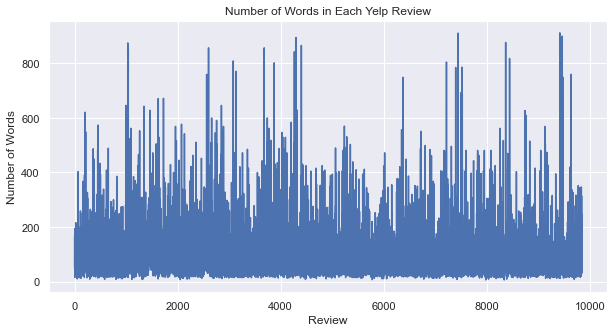

In [4]:
plt.figure(figsize = (10,5))
yelp_data['Word_Count'].plot()
plt.title('Number of Words in Each Yelp Review')
plt.xlabel('Review')
plt.ylabel('Number of Words')

In [16]:
yelp_data.describe()

,Zip_code,Rating,Word_Count
count,9849.000000,9849.000000,9849.000000
mean,10163.116865,3.619911,105.206721
std,864.128463,0.601277,94.671530
min,7029.000000,1.000000,6.000000
25%,10011.000000,3.500000,43.000000
50%,10022.000000,3.500000,78.000000
75%,10314.000000,4.000000,135.000000
max,11694.000000,5.000000,912.000000


Every review in our group is under a 1000 words. Next, we can also look at the character count of the reviews and later can see if it will be useful for our analysis

In [4]:
yelp_data['Chharacter_Count'] = yelp_data['Review'].apply(lambda x: len(str(x)))

In [5]:
yelp_data.head()

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...,49,267
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I thought the cookies and biscotti were prett...,122,643
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Guys.... so Im a big time biscotti connoisseu...,169,916
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I had a craving for a special type of cake wi...,59,313
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'The chocolate cups are amazing! Have been eat...,16,98


# Removing the Stop Words<a id='stop_words'></a>

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”. Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.

This source shows how to remove the stop words and has been used below.

https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [5]:
#!pip install nltk
nltk.download("stopwords")
nltk.download('punkt')

example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""

stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taimoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Taimoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We can use this and apply it to our dataset 

In [6]:
yelp_data['Lowercase_Review'] = yelp_data['Review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [7]:
yelp_data['No_punct'] = yelp_data['Lowercase_Review'].str.replace('[^\w\s]', '')

In [8]:
yelp_data.head(3)

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count,Lowercase_Review,No_punct
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...,49,267,'morris park bake shop has become my go to spo...,morris park bake shop has become my go to spot...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I thought the cookies and biscotti were prett...,122,643,'i thought the cookies and biscotti were prett...,i thought the cookies and biscotti were pretty...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Guys.... so Im a big time biscotti connoisseu...,169,916,'guys.... so im a big time biscotti connoisseu...,guys so im a big time biscotti connoisseur and...


In [9]:
Rev_without_sw = []

for i in range(len(yelp_data)):
    
    review = str(yelp_data['No_punct'][i])
    review = review
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)
    
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Rev_without_sw.append(filtered_sentence)

In [12]:
Rev_without_sw[0]

['morris',
 'park',
 'bake',
 'shop',
 'become',
 'go',
 'spot',
 'atmosphere',
 'place',
 'great',
 'inviting',
 'love',
 'every',
 'thing',
 'ordered',
 'staff',
 'really',
 'pleasant',
 'definitely',
 'help',
 'anything',
 'definitely',
 'come',
 'back',
 'morris',
 'park',
 'bake',
 'shop']

Now lets convert them into a filtered sentence and add it to out dataset

In [13]:
yelp_data['Tokens'] = Rev_without_sw
yelp_data['Filtered_Sentence'] = Rev_without_sw

for i in range(len(yelp_data)): 
    text_list = yelp_data['Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    yelp_data['Filtered_Sentence'][i] = blank

In [14]:
yelp_data.head(3)

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count,Lowercase_Review,No_punct,Tokens,Filtered_Sentence
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...,49,267,'morris park bake shop has become my go to spo...,morris park bake shop has become my go to spot...,"[morris, park, bake, shop, become, go, spot, a...",morris park bake shop become go spot atmosphe...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I thought the cookies and biscotti were prett...,122,643,'i thought the cookies and biscotti were prett...,i thought the cookies and biscotti were pretty...,"[thought, cookies, biscotti, pretty, good, def...",thought cookies biscotti pretty good definite...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Guys.... so Im a big time biscotti connoisseu...,169,916,'guys.... so im a big time biscotti connoisseu...,guys so im a big time biscotti connoisseur and...,"[guys, im, big, time, biscotti, connoisseur, a...",guys im big time biscotti connoisseur always ...


Given the stopwords, we can see how many stop words are present in each yelp reviews

In [15]:
StopWord_Count = []

for i in range(len(yelp_data)):
    review = str(yelp_data['Review'][i]).lower()
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    StopWord_Count.append(count)

yelp_data['StopWord_Count'] = StopWord_Count

Text(0.5, 1.0, 'Number of Stop Words in each Review')

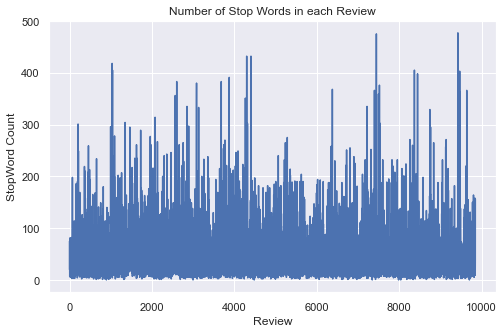

In [16]:
plt.figure(figsize = (8,5))
yelp_data['StopWord_Count'].plot()
plt.xlabel('Review')
plt.ylabel('StopWord Count')
plt.title('Number of Stop Words in each Review')

We can also look at the percentage of stop words is each review

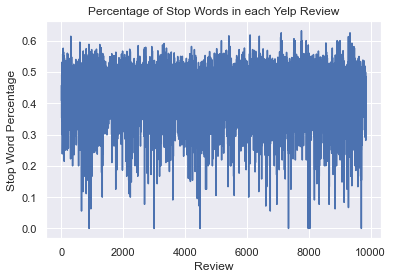

In [18]:
review_org = yelp_data['Word_Count']
review_sw = yelp_data['StopWord_Count']

yelp_data['%_SW'] = review_sw/review_org
yelp_data['%_SW'].plot()
plt.title('Percentage of Stop Words in each Yelp Review')
plt.xlabel('Review')
plt.ylabel('Stop Word Percentage')
plt.title('Percentage of Stop Words in each Yelp Review');

The reviews below have less than 5% of stop words

In [19]:
yelp_data[yelp_data['%_SW'] < 0.05]['Review']

894     'Best Bacon scallion cream cheese EVER‼‼‼‼bage...
2997    'savory cheese croissant (not like danish)cris...
4483    'Awesome cheap food! Good Ambience decently pr...
7346    'Large, good atmosphere. Good deals, great peo...
7984          'Terrible plain pie. Like eating cardboard.
8037    'Noice happy hour spot :) Great atmosphere, ni...
9703    'Heck yes. Good stuff. Good service. Great win...
Name: Review, dtype: object

In [22]:
yelp_data[yelp_data['%_SW'] < 0.05]['Review'][894]

"'Best Bacon scallion cream cheese EVER‼‼‼‼bagels r always fresh n people r always nice"

In [24]:
len(yelp_data[yelp_data['%_SW'] > 0.50]['Review'])

1328

There are 1328 reviews in our dataset that have more than 50% of stop words

# Building a Word Cloud<a id='word_cloud'></a>

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

This source explains how to build a word cloud and has been used and modified

https://www.geeksforgeeks.org/generating-word-cloud-python/

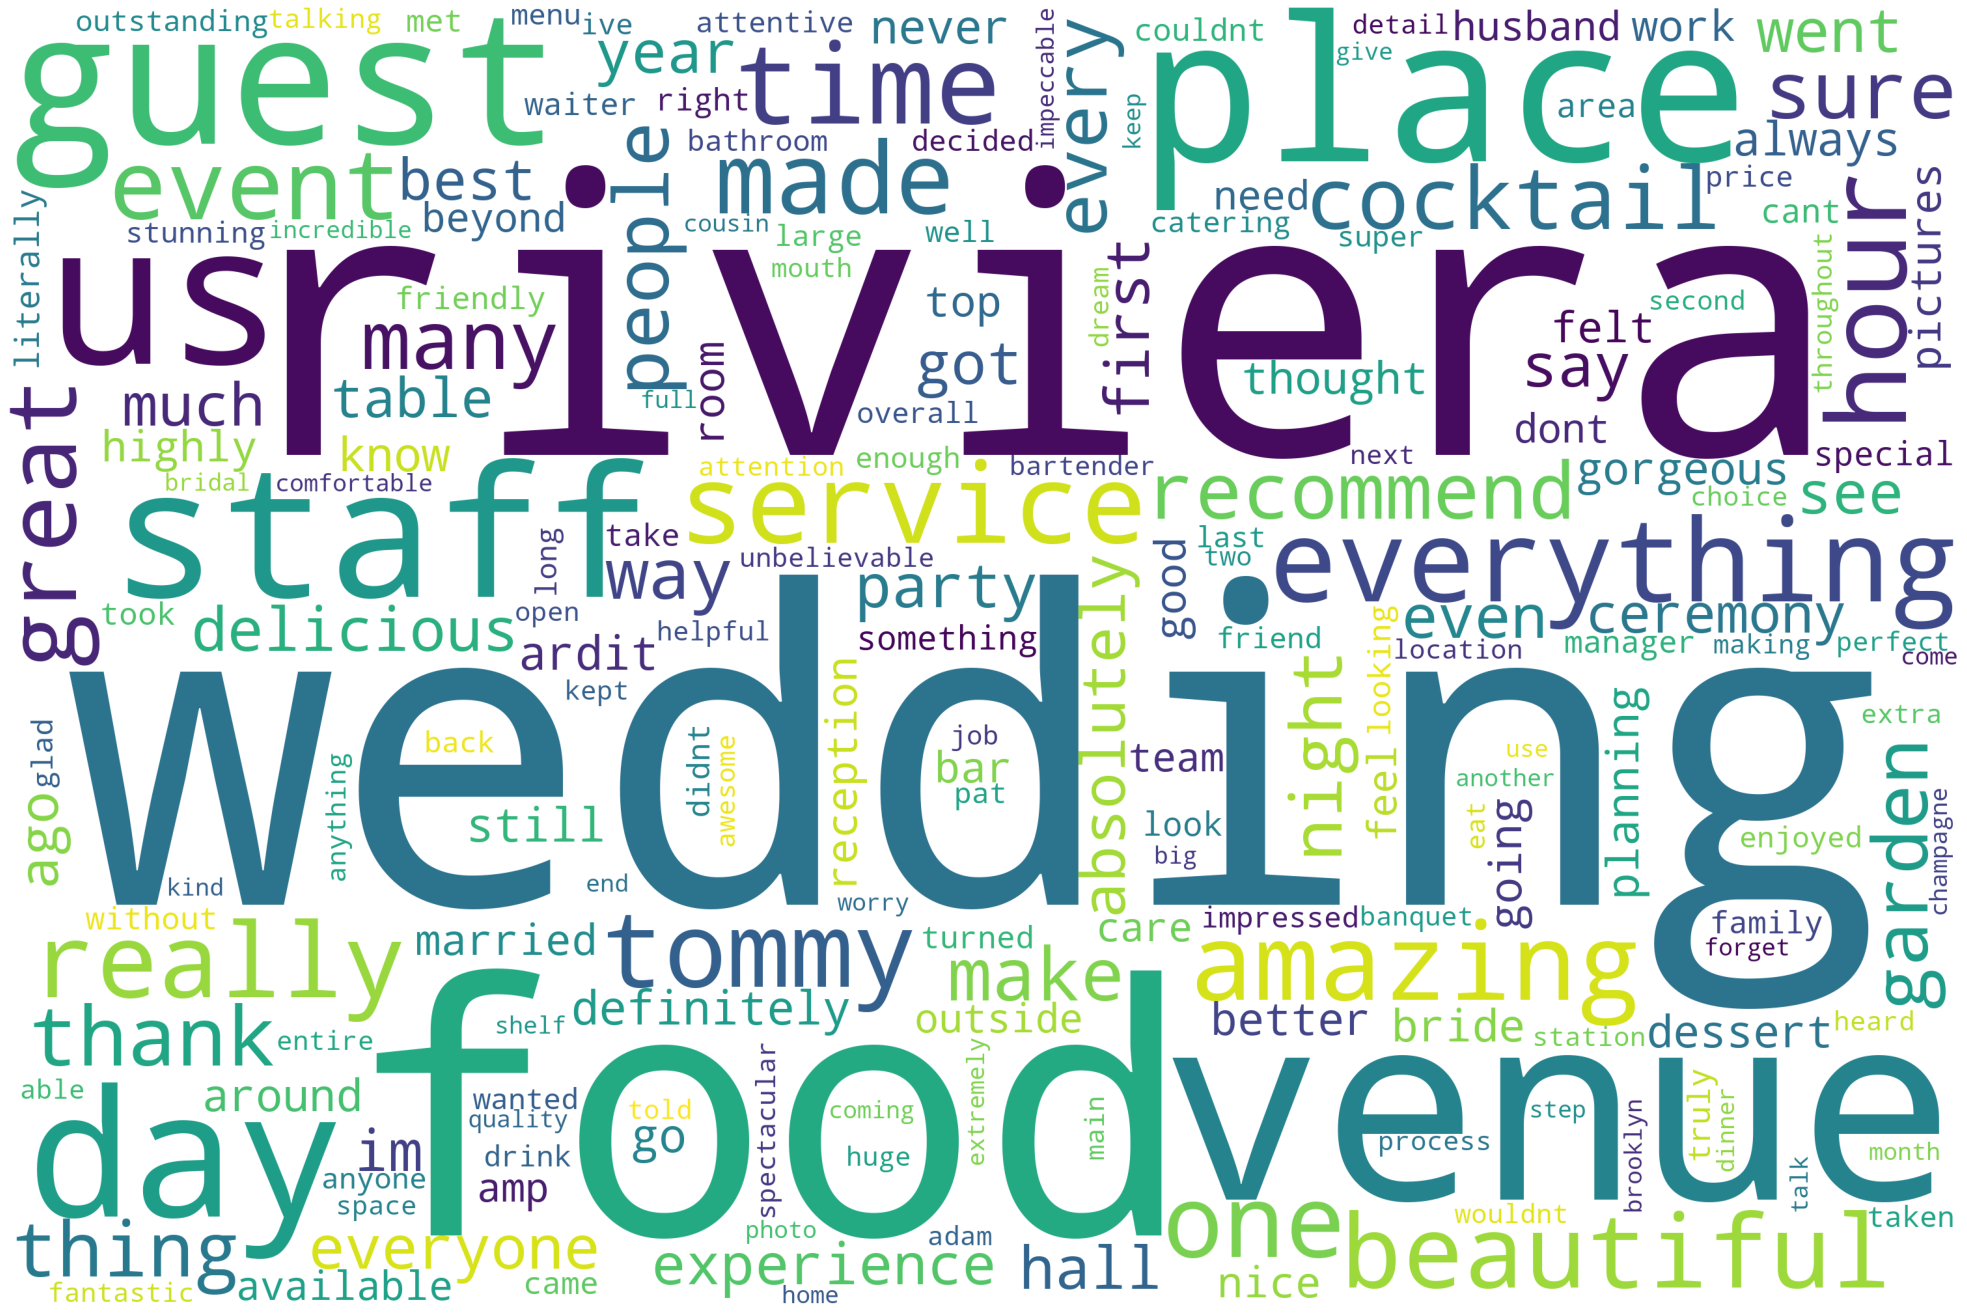

In [43]:
#!pip install wordcloud

def review_text(loc):
    all_words  = ''
    for i in range(len(yelp_data['Name'])):
        if yelp_data['Name'][i] == loc:
            words = yelp_data['Tokens'][i]
            blank = ''
            for word in words:
                blank = blank+' '+word
            all_words = all_words + ' '+blank
            
    return all_words


text = review_text("Riviera Caterers")

def plot_word_cloud(wordcloud):
    plt.figure(figsize=(35, 25))
    plt.imshow(wordcloud) 
    plt.axis("off");


wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(text)
plot_word_cloud(wordcloud)

By looking at the word cloud, it looks as if the overall sentiment of this place is pretty positive

# Stemming and Lemmatization<a id='stem_lem'></a>

Stemming is used to preprocess text data. The English language has many variations of a single word, so to reduce the ambiguity for a machine-learning algorithm to learn it’s essential to filter such words and reduce them to the base form. In the areas of Natural Language Processing we come across situation where two or more words have a common root. For example, the three words - agreed, agreeing and agreeable have the same root word agree. A search involving any of these words should treat them as the same word which is the root word. So it becomes essential to link all the words into their root word. The NLTK library has methods to do this linking and give the output showing the root word.

This resource has been used

https://www.askpython.com/python/examples/stemming-and-lemmatization
https://www.programcreek.com/python/example/99851/nltk.stem.snowball.SnowballStemmer

In [47]:
nltk.download('wordnet')
yelp_data['Lemmatized'] = yelp_data['Filtered_Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Taimoor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [51]:
Stemmer = SnowballStemmer("english")

sentence = yelp_data['Lemmatized'][9]
wordList = nltk.word_tokenize(sentence)

stemWords = [Stemmer.stem(word) for word in wordList]

stemmed = ' '.join(stemWords)
print('Sentence:\n', sentence)
print('')
print('Stemmed:\n',stemmed)

Sentence:
 cash bakery pastry good except tiramisu red velvet cake tiramisu soggy piece red velvet cake red velvet definitely need revamp ingredient magic besides staff friendly pastry good

Stemmed:
 cash bakeri pastri good except tiramisu red velvet cake tiramisu soggi piec red velvet cake red velvet definit need revamp ingredi magic besid staff friend pastri good


The next step is to Tokenize these stemmed reviews

In [52]:
def word_extraction(sentence):   
    words = re.sub("[^\w]", " ",  sentence).split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [53]:
stemmed_list = []
stemmed_token_list = []

for i in range(len(yelp_data)):
    sentence = yelp_data['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [Stemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [55]:
yelp_data['Stemmed_Sentence'] = stemmed_list

for i in range(len(yelp_data)):
    stemmed = yelp_data['Stemmed_Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_token_list.append(tokens)

In [56]:
yelp_data['Stemmed_Tokens'] = stemmed_token_list

yelp_data['Stemmed_Tokens'][0]

['morri',
 'park',
 'bake',
 'shop',
 'becom',
 'go',
 'spot',
 'atmospher',
 'place',
 'great',
 'invit',
 'love',
 'everi',
 'thing',
 'order',
 'staff',
 'realli',
 'pleasant',
 'definit',
 'help',
 'anyth',
 'definit',
 'come',
 'back',
 'morri',
 'park',
 'bake',
 'shop']

In [58]:
yelp_data.head(2)

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count,Lowercase_Review,No_punct,Tokens,Filtered_Sentence,StopWord_Count,%_SW,Lemmatized,Stemmed_Sentence,Stemmed_Tokens
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...,49,267,'morris park bake shop has become my go to spo...,morris park bake shop has become my go to spot...,"[morris, park, bake, shop, become, go, spot, a...",morris park bake shop become go spot atmosphe...,20,0.408163,morris park bake shop become go spot atmospher...,morri park bake shop becom go spot atmospher p...,"[morri, park, bake, shop, becom, go, spot, atm..."
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'I thought the cookies and biscotti were prett...,122,643,'i thought the cookies and biscotti were prett...,i thought the cookies and biscotti were pretty...,"[thought, cookies, biscotti, pretty, good, def...",thought cookies biscotti pretty good definite...,53,0.434426,thought cooky biscotti pretty good definitely ...,thought cooki biscotti pretti good definit tas...,"[thought, cooki, biscotti, pretti, good, defin..."


Same as the original word count and stop word count, we are going to make a count of the stemmed words

In [59]:
yelp_data['Stemmed_Word_Count'] = yelp_data['Stemmed_Sentence'].apply(lambda x: len(str(x).split()))

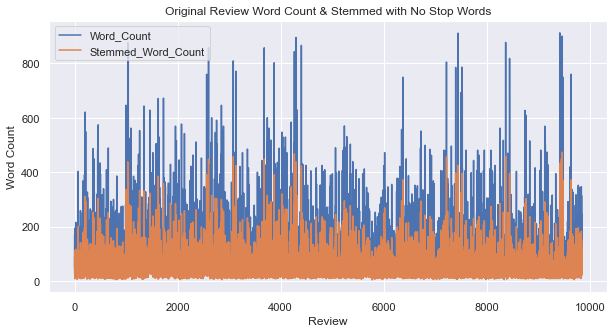

In [61]:
plt.figure(figsize=(10,5))
yelp_data[yelp_data['Word_Count'] < 1500]['Word_Count'].plot()
yelp_data[yelp_data['Stemmed_Word_Count'] < 1000]['Stemmed_Word_Count'].plot()
plt.xlabel('Review')
plt.ylabel('Word Count')
plt.title('Original Review Word Count & Stemmed with No Stop Words')
plt.legend()

As can be seen from the plot, stemming helps reducing the word count

# Opinion Lexicon<a id='op_lex'></a>

The lexicon-based approach for opinion mining depends on opinion (or sentiment) words, which are words that express positive or negative sentiments. Words that encode a desirable state (e.g., "great" and "good") have a positive polarity, while words that encode an undesirable state have a negative polarity (e.g., "bad" and "awful"). Although opinion polarity normally applies to adjectives and adverbs, there are verb and noun opinion words as well.

We are going to be looking at the positive lexicons

In [62]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lex = content.splitlines()
pos_lex_stem = [Stemmer.stem(word) for word in pos_lex]

In [64]:
pos_count = []

for i in range(len(yelp_data)):
    count = 0
    tokens = yelp_data['Stemmed_Tokens'][i]
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    pos_count.append(count)

In [65]:
yelp_data['Positive_Word_Count'] = pos_count

In [68]:
pos_rev = yelp_data['Positive_Word_Count']
stop_count = (yelp_data['Word_Count'] - yelp_data['StopWord_Count'])
yelp_data['%_Positive_Words'] = pos_rev/stop_count

In [71]:
yelp_data.head(1)

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count,...,Tokens,Filtered_Sentence,StopWord_Count,%_SW,Lemmatized,Stemmed_Sentence,Stemmed_Tokens,Stemmed_Word_Count,Positive_Word_Count,%_Positive_Words
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,$$,1007 Morris Park Ave,Bronx,10462,4.5,'Morris Park Bake Shop has become my go to spo...,49,267,...,"[morris, park, bake, shop, become, go, spot, a...",morris park bake shop become go spot atmosphe...,20,0.408163,morris park bake shop become go spot atmospher...,morri park bake shop becom go spot atmospher p...,"[morri, park, bake, shop, becom, go, spot, atm...",28,6,0.206897


Same as before we can graphically analyze the percentage of positive words in a review

Text(0, 0.5, '% Positive')

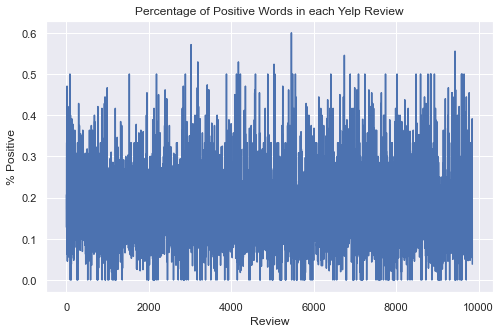

In [74]:
plt.figure(figsize = (8,5))
yelp_data['%_Positive_Words'].plot()
plt.title('Percentage of Positive Words in each Yelp Review')
plt.xlabel('Review')
plt.ylabel('% Positive')

In [80]:
yelp_data[yelp_data['%_Positive_Words'] > 0.5]

,Alias,Name,Price,Address,City,Zip_code,Rating,Review,Word_Count,Chharacter_Count,...,Tokens,Filtered_Sentence,StopWord_Count,%_SW,Lemmatized,Stemmed_Sentence,Stemmed_Tokens,Stemmed_Word_Count,Positive_Word_Count,%_Positive_Words
3023,dorrians-red-hand-jersey-city,Dorrian's Red Hand,$$,555 Washington Blvd,Jersey City,7310,4.0,'Amazing fast service! Great food and friendly...,19,115,...,"[amazing, fast, service, great, food, friendly...",amazing fast service great food friendly staf...,5,0.263158,amazing fast service great food friendly staff...,amaz fast servic great food friend staff love ...,"[amaz, fast, servic, great, food, friend, staf...",14,8,0.571429
3187,keats-bar-new-york-3,Keats Bar,$$,842 2nd Ave,New York,10017,3.0,'Had a blast here with my friends and family. ...,31,171,...,"[blast, friends, family, karaoke, super, fun, ...",blast friends family karaoke super fun barten...,14,0.451613,blast friend family karaoke super fun bartende...,blast friend famili karaok super fun bartend g...,"[blast, friend, famili, karaok, super, fun, ba...",16,9,0.529412
4172,nearys-new-york,Neary's,$$,358 East 57th St,New York,10022,4.0,'Great bar! Classy place. Friendly and reasona...,20,143,...,"[great, bar, classy, place, friendly, reasonab...",great bar classy place friendly reasonably pr...,3,0.150000,great bar classy place friendly reasonably pri...,great bar classi place friend reason price per...,"[great, bar, classi, place, friend, reason, pr...",17,9,0.529412
5036,orso-new-york,Orso,$$$,322 W 46th St,New York,10036,4.0,'Absolutely wonderful! Food was perfect and th...,35,234,...,"[absolutely, wonderful, food, perfect, wine, l...",absolutely wonderful food perfect wine lovely...,14,0.400000,absolutely wonderful food perfect wine lovely ...,absolut wonder food perfect wine love like com...,"[absolut, wonder, food, perfect, wine, love, l...",21,11,0.523810
5458,sutton-cafe-new-york,Sutton Cafe,$$,1026 1st Ave,New York,10022,2.5,"'Super cute, lovely service, and very good foo...",15,87,...,"[super, cute, lovely, service, good, food, nic...",super cute lovely service good food nice dine...,5,0.333333,super cute lovely service good food nice diner...,super cute love servic good food nice diner cu...,"[super, cute, love, servic, good, food, nice, ...",10,6,0.600000
6743,la-boite-en-bois-new-york-2,La Boite en Bois,$$$,75 W 68th St,New York,10023,3.5,"'Love this place!!! Very quaint, cozy and the ...",20,116,...,"[love, place, quaint, cozy, food, wonderful, l...",love place quaint cozy food wonderful lunch w...,9,0.450000,love place quaint cozy food wonderful lunch wo...,love place quaint cozi food wonder lunch wonde...,"[love, place, quaint, cozi, food, wonder, lunc...",10,6,0.545455
9429,newyork-presbyterian-weill-cornell-medical-cen...,NewYork-Presbyterian/Weill Cornell Medical Center,NaN,525 East 68th St,New York,10065,2.5,"'Clean, modern, well lit, and most importantly...",12,91,...,"[clean, modern, well, lit, importantly, excell...",clean modern well lit importantly excellent d...,3,0.250000,clean modern well lit importantly excellent do...,clean modern well lit import excel doctor nurs...,"[clean, modern, well, lit, import, excel, doct...",9,5,0.555556


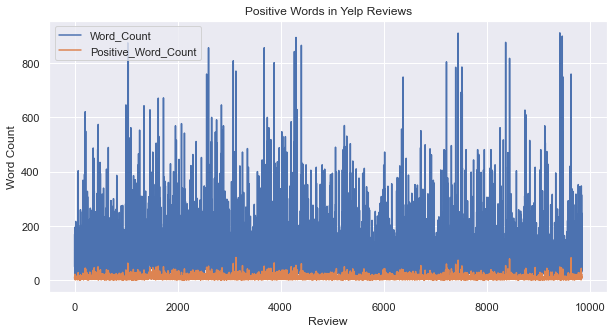

In [81]:
plt.figure(figsize=(10,5))
yelp_data[yelp_data['Word_Count'] < 1500]['Word_Count'].plot()
yelp_data[yelp_data['Positive_Word_Count'] < 600]['Positive_Word_Count'].plot()
plt.xlabel('Review')
plt.ylabel('Word Count')
plt.title('Positive Words in Yelp Reviews')
plt.legend()

# Counting Words<a id='count_words'></a>

Now, we are going to be counting words i.e. how many times a word was used in all the reviews.
There are several ways to count words in Python: the easiest is probably to use a Counter! We'll be covering another technique here, the CountVectorizer from scikit-learn.

CountVectorizer is a little more intense than using Counter. While Counter is used for counting all sorts of things, the CountVectorizer is specifically used for counting words. The vectorizer part of CountVectorizer is the process of converting text into some sort of number thing that computers can understand.

In [99]:
def get_stemmed_tokens(loc):
    tokens = []
    for i in range(len(yelp_data['Stemmed_Tokens'])):
        if yelp_data['Name'][i] == loc:
            tok = yelp_data['Stemmed_Tokens'][i]
            tokens.append(str(tok))
            
    return tokens

text = get_stemmed_tokens("Riviera Caterers")
vec = CountVectorizer()
X = vec.fit_transform(text)
word_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [100]:
word_matrix.head()

,060318,10,100,1000,11,110,12,140,15,19th,...,wtf,xoxo,year,yegor13,yet,youll,young,your,zach,zack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
def word_frequency_graph(index):

    text = get_stemmed_tokens(yelp_data['Name'].unique()[index])
    vec = CountVectorizer()
    X = vec.fit_transform(text)
    df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    df = df.sort_values(by = (len(df)-1), axis=1, ascending=False)
    df20 = df.iloc[:, : 20]
    x = df20.iloc[len(df20)-1]
    plt.figure(figsize=(15,4))
    plt.xlabel('Stemmed Word')
    plt.ylabel('Number of Occurances')
    plt.title('Word Frequency in Yelp Reviews for '+ yelp_data['Name'].unique()[index] + ' (Top 20)')
    plt.plot(x)

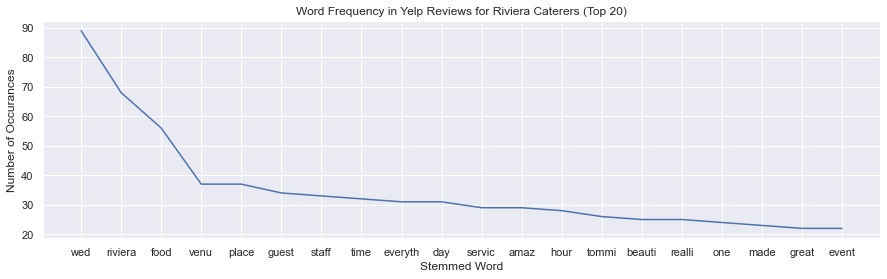

In [130]:
word_frequency_graph(3)

From the plot, it can be seen that some of the top words are, __'amaz', 'beauti'__. It implies that the reviews of Riviera Caterers have a positive sentiment. It coincides with the rating of the place which is 4.5.

We can now look at a restaurant with low rating.

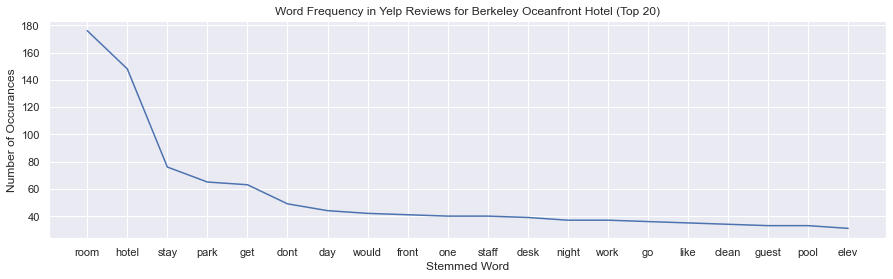

In [117]:
low_rating = list(yelp_data[yelp_data['Rating'] < 2.5]['Name'])[0]
low_index = list(yelp_data['Name'].unique()).index(low_rating)

word_frequency_graph(low_index)

# Conclusion<a id='conclusion'></a>

Through Exploratory Data Analysis, we have a much better understanding of our data. We have created several metrics. We have the word count of the original reviews, the word count of the positive words and also the stop words which we can later use to classify our reviews as positive or negative. The next step will be to do preprocessing and modeling.

In [131]:
yelp_data.to_csv(r'yelp_data_EDA.csv',index=False)